Name: Anuja Pachwadkar

Roll No : BBCO21159



Assignment 2

Classification using Deep neural network (Any One from the following)
1. Multiclass classification using Deep Neural Networks: Example: Use the OCR letter recognition dataset https://archive.ics.uci.edu/ml/datasets/letter+recognition
2. Binary classification using Deep Neural Networks Example: Classify movie reviews into positive" reviews and "negative" reviews, just based on the text content of the reviews. Use IMDB dataset.





In [ ]:
from keras.datasets import imdb

# Load the data, keeping only the 10,000 most frequently occurring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Find the maximum word index in each review
max_indexes = [max(sequence) for sequence in train_data]

# Find the highest index among all reviews
max_index = max(max_indexes)
print("Max word index:", max_index)


Max word index: 9999


In [ ]:
import textwrap
from keras.datasets import imdb

# Load dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Load the word index
word_index = imdb.get_word_index()

# Reverse word index to map integers to words
reverse_word_index = {value: key for (key, value) in word_index.items()}

# Decode the first review
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Format and print the decoded review
print("Decoded Review:\n")
print(textwrap.fill(decoded_review, width=80))  # Wrap text for better readability


Decoded Review:

? this film was just brilliant casting location scenery story direction
everyone's really suited the part they played and you could just imagine being
there robert ? is an amazing actor and now the same being director ? father came
from the same scottish island as myself so i loved the fact there was a real
connection with this film the witty remarks throughout the film were great it
was just brilliant so much that i bought the film as soon as it was released for
? and would recommend it to everyone to watch and the fly fishing was amazing
really cried at the end it was so sad and you know what they say if you cry at a
film it must have been good and this definitely was also ? to the two little
boy's that played the ? of norman and paul they were just brilliant children are
often left out of the ? list i think because the stars that play them all grown
up are such a big profile for the whole film but these children are amazing and
should be praised for what they have d

In [ ]:
import numpy as np

# Function to vectorize sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Set specific indices to 1
    return results

# Vectorize training and testing data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

# Convert labels to float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Check shape of X_train
print("X_train shape:", X_train.shape)


X_train shape: (25000, 10000)


In [ ]:
from keras import models, layers, optimizers, losses

# Define the model
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Create validation set
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Create validation labels
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [ ]:
# Train the model
history = model.fit(
    partial_X_train, partial_y_train,
    epochs=20, batch_size=512,
    validation_data=(X_val, y_val)
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6899 - loss: 0.6076 - val_accuracy: 0.8619 - val_loss: 0.4104
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8893 - loss: 0.3561 - val_accuracy: 0.8678 - val_loss: 0.3376
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9114 - loss: 0.2642 - val_accuracy: 0.8839 - val_loss: 0.2941
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9352 - loss: 0.2048 - val_accuracy: 0.8893 - val_loss: 0.2763
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9426 - loss: 0.1745 - val_accuracy: 0.8877 - val_loss: 0.2760
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9567 - loss: 0.1429 - val_accuracy: 0.8822 - val_loss: 0.2891
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9586 - loss: 0.1278 - val_accuracy: 0.8837 - val_loss: 0.2937
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9677 - loss: 0.1115 - val_accuracy: 0.8718 - v

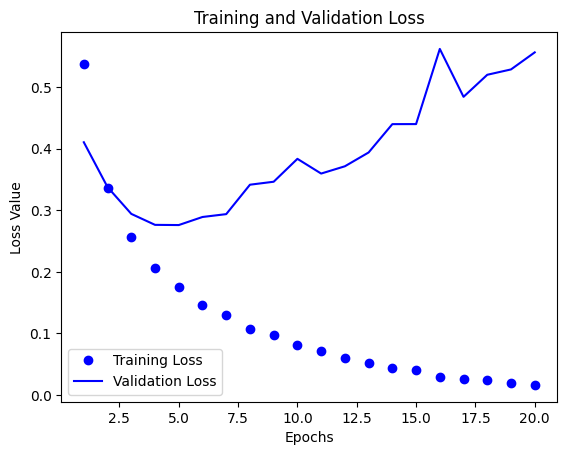

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

# Extract loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Plot losses
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


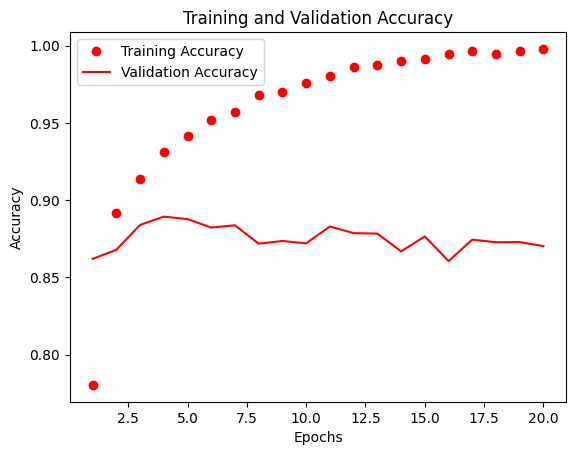

In [ ]:
# Extract accuracy values
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

# Plot accuracy
plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.fit(
    partial_X_train, partial_y_train,
    epochs=3, batch_size=512,
    validation_data=(X_val, y_val)
)


Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9987 - loss: 0.0123 - val_accuracy: 0.8693 - val_loss: 0.5793
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9984 - loss: 0.0110 - val_accuracy: 0.8697 - val_loss: 0.5948
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9998 - loss: 0.0070 - val_accuracy: 0.8703 - val_loss: 0.6182


In [ ]:
np.set_printoptions(suppress=True)  # Suppress scientific notation
result = model.predict(X_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Convert probabilities to 0 or 1
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.14232
